In [1]:
#Importar el drive para usar el dataset y carga de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from seaborn import violinplot
from sklearn.preprocessing import LabelEncoder


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Ruta del archivo en Google Drive
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
counter = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


<ipython-input-2-e48695eea88a>:6: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  counter = pd.read_csv(name, sep=";")


## Fase 3: Data Preparation

In [5]:
counter_backup = counter.copy()

In [6]:
counter_backup.drop(columns=['FirstKillTime'], inplace=True)
counter_backup.drop(columns=['TimeAlive'], inplace=True)
counter_backup.drop(columns=['TravelledDistance'], inplace=True)

### Eliminacion de datos atipicos

In [7]:
counter_backup.drop(counter_backup[counter_backup['MatchKills'] > 28].index, inplace=True)
counter_backup.shape

(78995, 27)

In [8]:
counter_backup.drop(counter_backup[counter_backup['MatchAssists'] > 8].index, inplace=True)
counter_backup.shape

(78710, 27)

In [9]:
label_encoder = LabelEncoder()
counter_backup['Team'] = label_encoder.fit_transform(counter_backup['Team'])
counter_backup['Map'] = label_encoder.fit_transform(counter_backup['Map'])

In [10]:
counter_backup['Map'].unique()

array([1, 3, 2, 0])

### Transformar datos booleanos

In [ ]:
counter_backup.RoundWinner = counter_backup.RoundWinner.astype(bool)
counter_backup.MatchWinner = counter_backup.MatchWinner.astype(bool)
# Conversion
counter_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
counter_backup.MatchWinner.replace({True: 1, False: 0}, inplace=True)
counter_backup.Survived.replace({True: 1, False: 0}, inplace=True)

In [12]:
# Revisiom
counter_backup.info()
# Vista previa
counter_backup.head()

<class 'pandas.core.frame.DataFrame'>
Index: 78710 entries, 0 to 79156
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   78710 non-null  int64  
 1   Map                          78710 non-null  int64  
 2   Team                         78710 non-null  int64  
 3   InternalTeamId               78710 non-null  int64  
 4   MatchId                      78710 non-null  int64  
 5   RoundId                      78710 non-null  int64  
 6   RoundWinner                  78710 non-null  int64  
 7   MatchWinner                  78710 non-null  int64  
 8   Survived                     78710 non-null  int64  
 9   AbnormalMatch                78710 non-null  bool   
 10  RLethalGrenadesThrown        78710 non-null  int64  
 11  RNonLethalGrenadesThrown     78710 non-null  int64  
 12  PrimaryAssaultRifle          78710 non-null  float64
 13  PrimarySniperRifle   

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,1,1,1,4,1,1,1,0,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,1,1,1,4,1,1,1,0,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,1,1,1,4,1,1,1,0,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,1,1,1,4,1,1,1,0,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,1,1,1,4,1,1,1,1,False,...,0,0,0,0,1000,4400,0,0,0,0


In [13]:
# Limitar numero de rondas
counter_backup = counter_backup[(counter_backup['RoundId'] >= 1) & (counter_backup['RoundId'] <= 30)]

counter_backup['RoundId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

### Regresion lineal multiple

COMPARACIÓN DE RENDIMIENTO
-------------------------
Métrica		Entrenamiento	Prueba	Diferencia
R²		0.604		0.597		0.007
MAE		0.41		0.41		-0.00


TypeError: missing a required argument: 'y_pred'

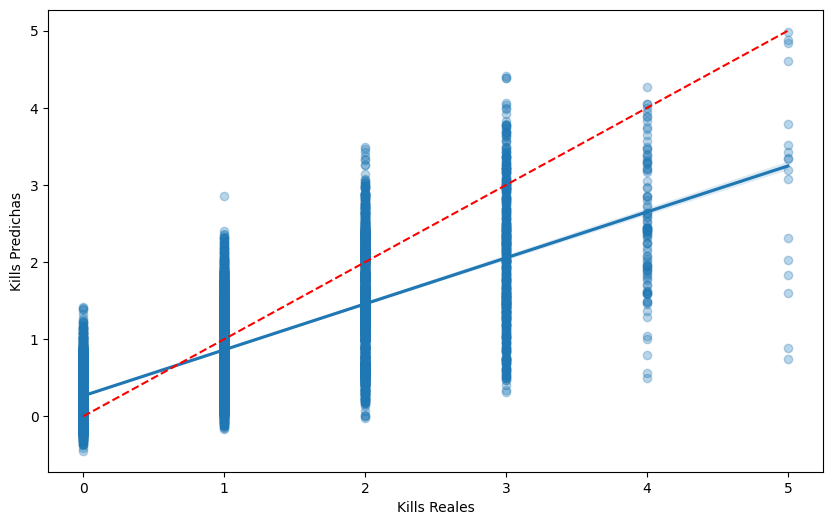

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

X = counter_backup.drop(['MatchId', 'Team', 'RoundKills'], axis=1)
y = counter_backup['RoundKills']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

train_pred =  modelo.predict(X_train)
test_pred = modelo.predict(X_test)

print("COMPARACIÓN DE RENDIMIENTO")
print("-------------------------")
print(f"Métrica\t\tEntrenamiento\tPrueba\tDiferencia")
print(f"R²\t\t{r2_score(y_train, train_pred):.3f}\t\t{r2_score(y_test, test_pred):.3f}\t\t{r2_score(y_train, train_pred) - r2_score(y_test, test_pred):.3f}")
print(f"MAE\t\t{mean_absolute_error(y_train, train_pred):.2f}\t\t{mean_absolute_error(y_test, test_pred):.2f}\t\t{mean_absolute_error(y_train, train_pred) - mean_absolute_error(y_test, test_pred):.2f}")


# Gráfico de valores reales vs predichos
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=test_pred, scatter_kws={'alpha':0.3})
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Kills Reales')
plt.ylabel('Kills Predichas')
plt.title('Comparación de Valores Reales vs Predichos\nR² = {:.3f}'.format(r2_score(y_test, y_test_pred)))
plt.show()